In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00


=== Task 1: Change Gate Order (Swap X and H) ===
Original Order (X → H): {'1 0': 512, '0 0': 512}


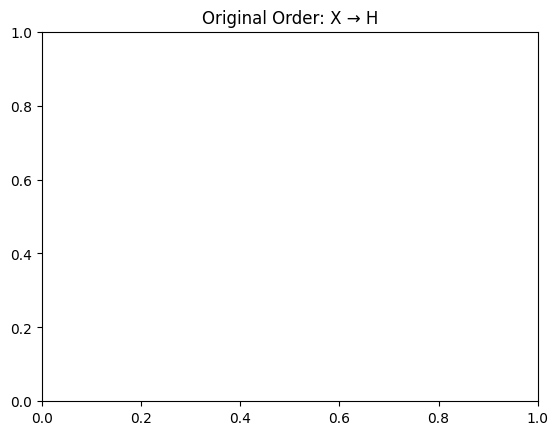

Swapped Order (H → X): {'0 0': 520, '1 0': 504}


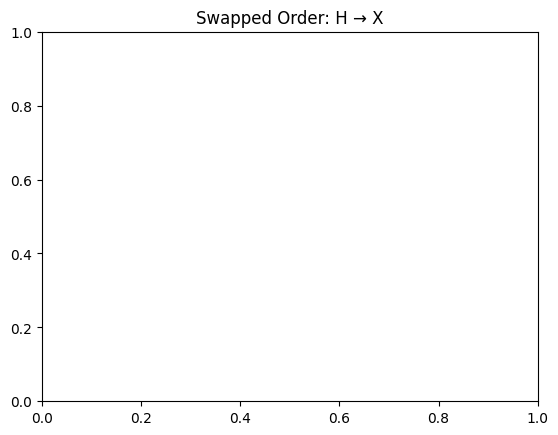


=== Task 2: Vary Rotation Angle (Rz) ===
Rotation Angle θ = 0.785 radians: {'1 0': 529, '0 0': 495}


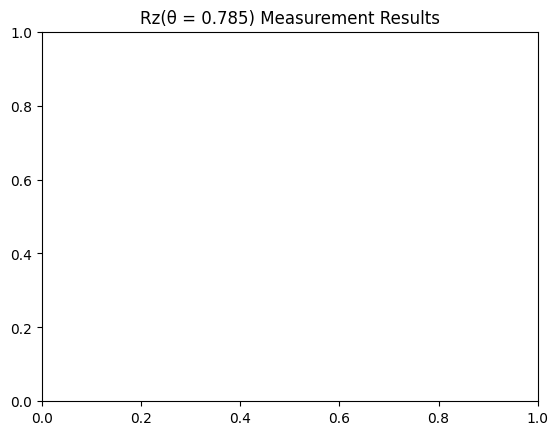

Rotation Angle θ = 1.571 radians: {'1 0': 519, '0 0': 505}


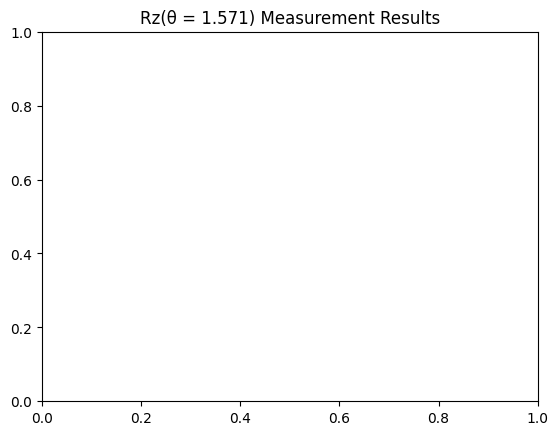

Rotation Angle θ = 3.142 radians: {'0 0': 532, '1 0': 492}


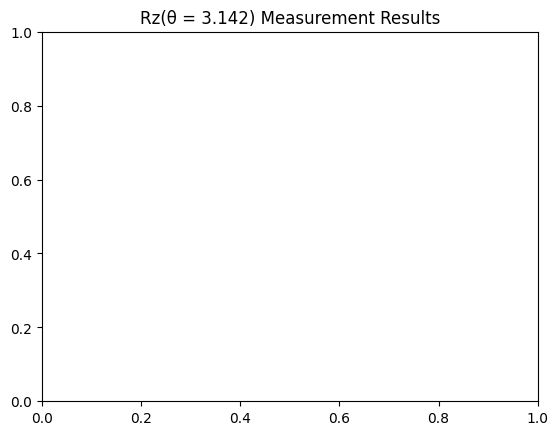


=== Task 3: Remove Hadamard Gate ===
Without Hadamard Gate: {'0 0': 1024}


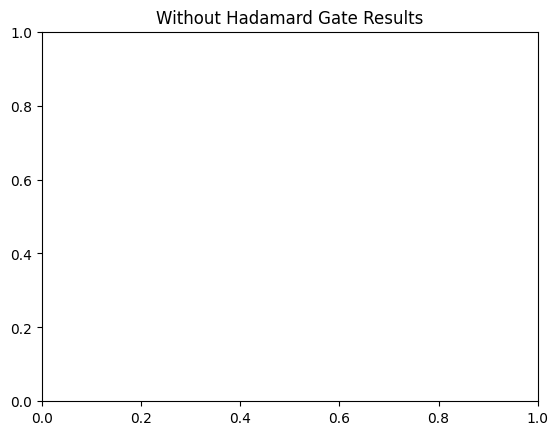

In [6]:
# ===============================================================
# Quantum Gates Exploration in Qiskit
# ===============================================================

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import math
import matplotlib.pyplot as plt

# Initialize simulator
sim = AerSimulator()


# ===============================================================
# Task 1: Change Gate Order
# ===============================================================
print("=== Task 1: Change Gate Order (Swap X and H) ===")

# Original order: X -> H
qc_original = QuantumCircuit(1, 1)
qc_original.x(0)
qc_original.h(0)
qc_original.measure_all()

compiled_orig = transpile(qc_original, sim)
result_orig = sim.run(compiled_orig, shots=1024).result()
counts_orig = result_orig.get_counts()

print("Original Order (X → H):", counts_orig)
plot_histogram(counts_orig)
plt.title("Original Order: X → H")
plt.show()

# Swapped order: H -> X
qc_swapped = QuantumCircuit(1, 1)
qc_swapped.h(0)
qc_swapped.x(0)
qc_swapped.measure_all()

compiled_swap = transpile(qc_swapped, sim)
result_swap = sim.run(compiled_swap, shots=1024).result()
counts_swap = result_swap.get_counts()

print("Swapped Order (H → X):", counts_swap)
plot_histogram(counts_swap)
plt.title("Swapped Order: H → X")
plt.show()

# ===============================================================
# Task 2: Vary Rotation Angle (Rz)
# ===============================================================
print("\n=== Task 2: Vary Rotation Angle (Rz) ===")

angles = [math.pi/4, math.pi/2, math.pi]  # π/4, π/2, π
for theta in angles:
    qc_rz = QuantumCircuit(1, 1)
    qc_rz.h(0)
    qc_rz.rz(theta, 0)
    qc_rz.measure_all()

    compiled_rz = transpile(qc_rz, sim)
    result_rz = sim.run(compiled_rz, shots=1024).result()
    counts_rz = result_rz.get_counts()

    print(f"Rotation Angle θ = {round(theta, 3)} radians:", counts_rz)
    plot_histogram(counts_rz)
    plt.title(f"Rz(θ = {round(theta, 3)}) Measurement Results")
    plt.show()

# ===============================================================
# Task 3: Remove a Gate (Remove Hadamard)
# ===============================================================
print("\n=== Task 3: Remove Hadamard Gate ===")

qc_no_h = QuantumCircuit(1, 1)
qc_no_h.rz(math.pi/2, 0)  # Keep only Rz rotation
qc_no_h.measure_all()

compiled_no_h = transpile(qc_no_h, sim)
result_no_h = sim.run(compiled_no_h, shots=1024).result()
counts_no_h = result_no_h.get_counts()

print("Without Hadamard Gate:", counts_no_h)
plot_histogram(counts_no_h)
plt.title("Without Hadamard Gate Results")
plt.show()
